
--- Multiple Linear Regression Results ---
RMSE: 2.3784
R²:   0.7241


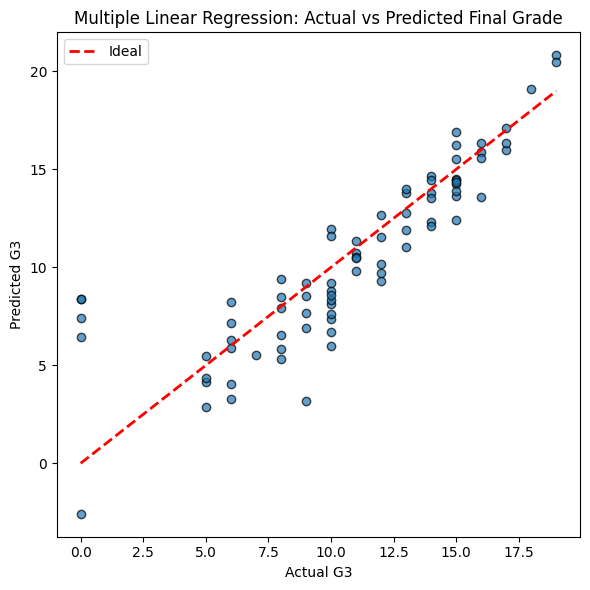

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Collection
df = pd.read_csv('student-mat.csv')

target_col = 'G3'

# 2. Data Preprocessing
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != target_col]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# 3. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Model Training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Prediction & Evaluation
y_pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Multiple Linear Regression Results ---")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# 6. Visualization: Actual vs Predicted Final Grade
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Ideal')

plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Multiple Linear Regression: Actual vs Predicted Final Grade')
plt.legend()
plt.tight_layout()
plt.show()



Best alpha (Lasso): 0.09102981779915217

--- Lasso Regression Results ---
RMSE: 2.1732
R²:   0.7697
Non-zero coefficients: 17 / 41


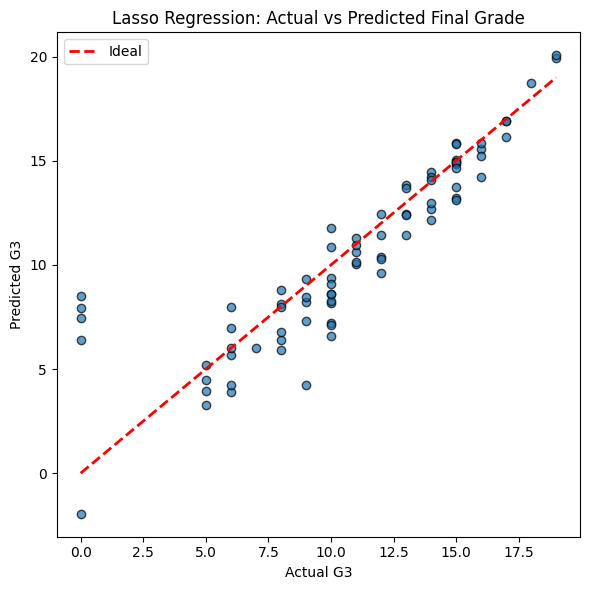

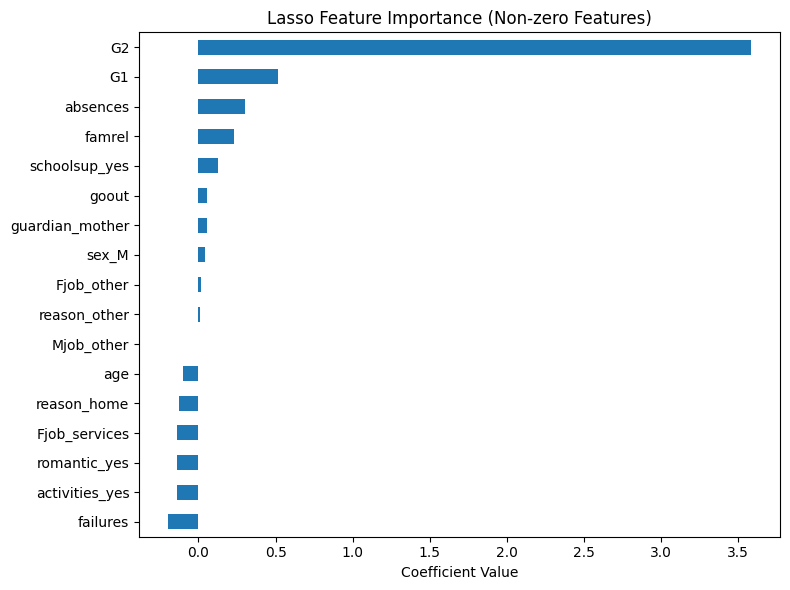

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Collection
df = pd.read_csv('student-mat.csv')

target_col = 'G3'

# 2. Data Preprocessing
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != target_col]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

feature_names = X.columns

# 3. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Lasso with Cross‑Validation
alphas = np.logspace(-4, 1, 50)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("\nBest alpha (Lasso):", lasso_cv.alpha_)

# 6. Prediction & Evaluation
y_pred = lasso_cv.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Lasso Regression Results ---")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

non_zero = np.sum(lasso_cv.coef_ != 0)
print(f"Non-zero coefficients: {non_zero} / {len(lasso_cv.coef_)}")

# 7. Visualization 1: Actual vs Predicted Final Grade
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Ideal')

plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Lasso Regression: Actual vs Predicted Final Grade')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualization 2: Lasso Feature Importance (Non‑zero Coefficients)
coef_series = pd.Series(lasso_cv.coef_, index=feature_names)
coef_nonzero = coef_series[coef_series != 0].sort_values()

plt.figure(figsize=(8, 6))
coef_nonzero.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Lasso Feature Importance (Non‑zero Features)')
plt.tight_layout()
plt.show()



Best alpha (Ridge): 4.941713361323833

--- Ridge Regression Results ---
RMSE: 2.3667
R²:   0.7268


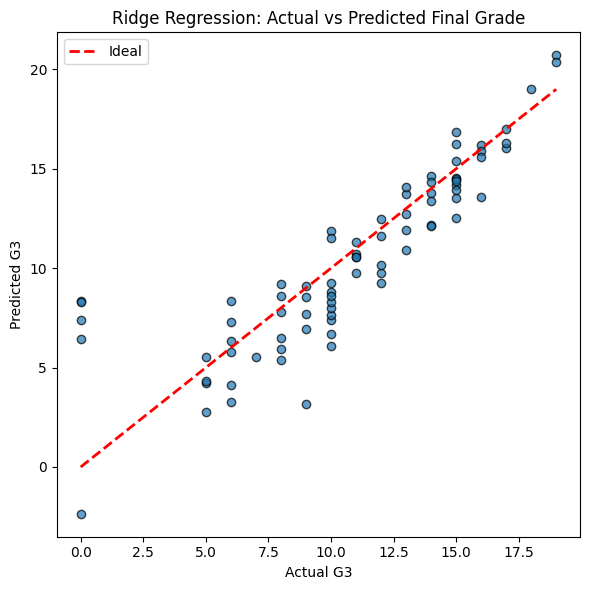

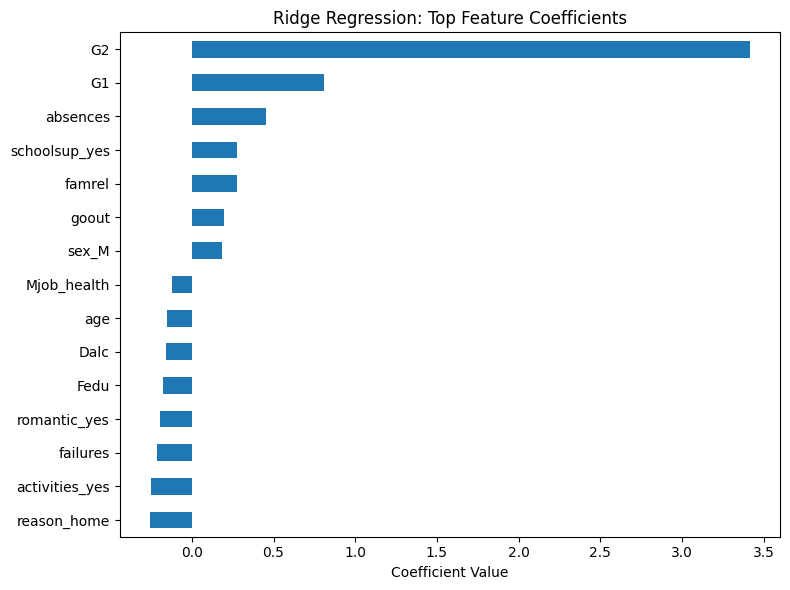

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Collection
df = pd.read_csv('student-mat.csv')

target_col = 'G3'

# 2. Data Preprocessing
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != target_col]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

feature_names = X.columns

# 3. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Ridge with Cross‑Validation
alphas = np.logspace(-2, 2, 50)

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("\nBest alpha (Ridge):", ridge_cv.alpha_)

# 6. Prediction & Evaluation
y_pred = ridge_cv.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Ridge Regression Results ---")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# 7. Visualization 1: Actual vs Predicted Final Grade
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Ideal')

plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Ridge Regression: Actual vs Predicted Final Grade')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualization 2: Top Ridge Coefficients
coef_series = pd.Series(ridge_cv.coef_, index=feature_names)
coef_sorted = coef_series.sort_values(key=lambda s: s.abs(), ascending=False)

top_n = 15
plt.figure(figsize=(8, 6))
coef_sorted.head(top_n).sort_values().plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression: Top Feature Coefficients')
plt.tight_layout()
plt.show()
